In [1]:
# https://sharmaabhishekk.github.io/projects/passmap?utm_source=pocket_saves
# data source
# https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/{match_id}.json

# https://medium.com/@abhishekmahajan_24059/analyzing-football-game-event-data-using-mplsoccer-in-python-d95d751682c2


In [2]:
import json
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import requests
from pandas import json_normalize
import numpy as np
# from pitch import Pitch

In [3]:
# import warnings

# from pandas.core.common import SettingWithCopyWarning
# warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import math

# def Pitch(ax, height = 120,  width=80, line_color = "black", pitch_color = "white", mode = "full", pitch_linewidth = 1):


In [5]:
height = 120
width=80
line_color = "black"
pitch_color = "white"
mode = "full"
pitch_linewidth = 1

def int_angles(radius, h, k, line_x):
    """
    Calculate the intersection angles of the arc above the D-boxes
    
    Parameters: 
        radius (float): Radius of the arc
        h(float): x coordinate of the centre of the arc
        k(float): y coordiante of the centre of the arc
        line_x(float): x coordinate of the D-box or the line to be intersected by the arc
    
    Returns: 
        theta1(float): First intersection angle
        theta2(float): Second intersection angle
    """
    y1 = math.sqrt(radius**2 - (line_x - h)**2) + k
    y2 = math.sqrt(radius**2 - (line_x - h)**2)*-1 + k
    y = (y1-y2)/2
    theta1 = math.degrees(math.asin(y/radius))
    theta2 = 360-theta1

    return theta1, theta2



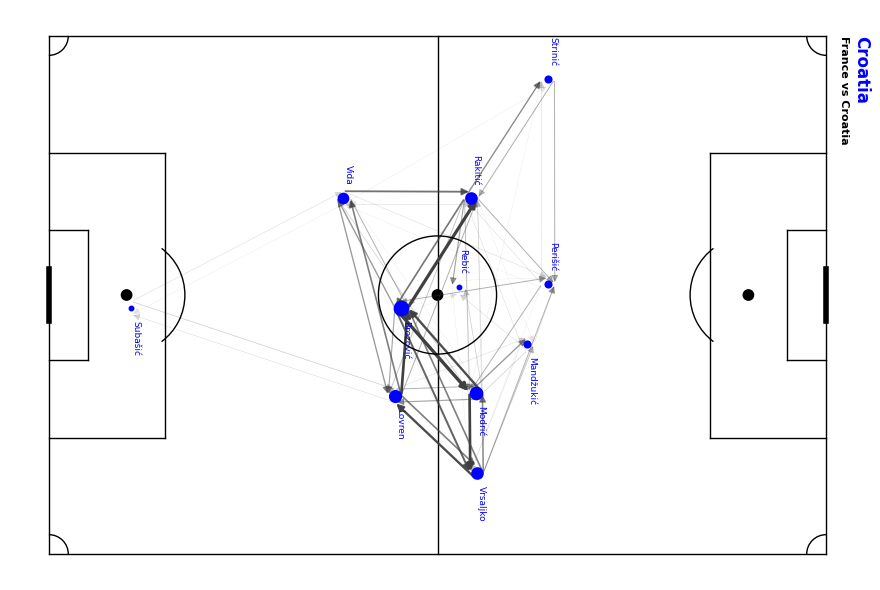

In [6]:
fig, ax = plt.subplots(figsize=(10,6))

#Pitch Outline
ax.plot([0,0],[0,width], color=line_color, linewidth = pitch_linewidth)
ax.plot([0,height],[width,width], color=line_color, linewidth = pitch_linewidth)
ax.plot([height,height],[width,0], color=line_color, linewidth = pitch_linewidth)
ax.plot([height,0],[0,0], color=line_color, linewidth = pitch_linewidth)

##Halfway-line
ax.plot([height/2, height/2],[0,width], color=line_color, linewidth = pitch_linewidth)

#Left Penalty Area
ax.plot([0,.15*height],[.225*width, .225*width], color=line_color, linewidth = pitch_linewidth)
ax.plot([.15*height, .15*height],[.225*width,0.775*width], color=line_color, linewidth = pitch_linewidth)
ax.plot([.15*height,0],[.775*width, .775*width], color=line_color, linewidth = pitch_linewidth)

#Right Penalty Area
ax.plot([.85*height,height],[.15*height, .15*height], color=line_color, linewidth = pitch_linewidth)
ax.plot([.85*height,.85*height],[.15*height, .775*width], color=line_color, linewidth = pitch_linewidth)
ax.plot([.85*height,height],[.775*width, .775*width], color=line_color, linewidth = pitch_linewidth)

#6-yard box left
ax.plot([0,.05*height],[.375*width, .375*width], color=line_color, linewidth = pitch_linewidth)
ax.plot([.05*height, .05*height],[.375*width,width - .375*width], color=line_color, linewidth = pitch_linewidth)
ax.plot([0,.05*height],[.625*width, .625*width ], color=line_color, linewidth = pitch_linewidth)    

#6-yard box right
ax.plot([.95*height,height],[.375*width, .375*width], color=line_color, linewidth = pitch_linewidth)
ax.plot([.95*height,114],[.375*width, .625*width], color=line_color, linewidth = pitch_linewidth)
ax.plot([.95*height,height],[.625*width, .625*width], color=line_color, linewidth = pitch_linewidth)

    
    #Prepare Circles
centreCircle = plt.Circle((height/2, width/2),.076*height,color=line_color,fill=False, zorder=5)
centreSpot = plt.Circle((height/2, width/2),0.8,color=line_color)
leftPenSpot = plt.Circle((.1*height,40),0.8,color=line_color)
rightPenSpot = plt.Circle((.9*height,40),0.8,color=line_color)

            
    #Prepare Arcs
theta1, theta2 = int_angles(radius = height/12,
                            h = .1*height,
                            k= width/2,
                            line_x = .15*height)


leftArc = Arc((.1*height,40),
                            height=0.15*height,
                            width=0.15*height,
                            angle=0,
                            theta1=theta2,
                            theta2=theta1,
                            color=line_color,
                            zorder=5)

theta1, theta2 = int_angles(radius = height/12,
                            h = .9*height,
                            k= width/2,
                            line_x = .85*height)

rightArc = Arc((.9*height,40),
                            height=0.15*height,
                            width=0.15*height,
                            angle=180,
                            theta1=theta2,
                            theta2=theta1,
                            color=line_color,
                            zorder=5)

    ##Add corner arcs
left_bottom = Arc((0,0),
                height=.05*height,
                width=0.05*height,
                angle=270,
                theta1=90,
                theta2=180,
                color=line_color,
                zorder=5)

left_top = Arc((0,width),
                height=.05*height,
                width=0.05*height,
                angle=0,
                theta1=270,
                theta2=0,
                color=line_color,
                zorder=5)

right_bottom = Arc((height, 0),
                height=.05*height,
                width=0.05*height,
                angle=0,
                theta1=90,
                theta2=180,
                color=line_color,
                zorder=5    )

right_top = Arc((height, width),
                height=.05*height,
                width=0.05*height,
                angle=90,
                theta1=90,
                theta2=180,
                color=line_color,
                zorder=5 )    


    #Goals
ax.plot([0,0],[.45*width, .55*width],color=line_color, linewidth = pitch_linewidth*4)
ax.plot([height, height],[.45*width, .55*width],color=line_color, linewidth = pitch_linewidth*4)

    #Add patches
ax.add_patch(leftArc)
ax.add_patch(rightArc)

ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

if mode == "full":
    ax.add_patch(left_bottom)
    ax.add_patch(left_top)
    ax.add_patch(right_bottom)
    ax.add_patch(right_top)

ax.set_aspect("equal")
ax.axis("off")

match_id = "8658"
side="away"
color="blue"
min_pass_count = 2 ##minimum number of passes for a link to be plotted

class Player:
    def __init__(self, player, df):
        self.id = player["player"]["id"]
        self.name = player["player"]["name"]
        self.average_position(df)

    def average_position(self, df):

        player_pass_df = df.query("(type_name == 'Pass') & (pass_type_name not in ['Free Kick', 'Corner', 'Throw-in', 'Kick Off']) & (player_id == @self.id) & (pass_outcome_name not in ['Unknown','Out','Pass Offside','Injury Clearance', 'Incomplete'])")
        self.x, self.y = np.mean(player_pass_df['location'].tolist(), axis=0)

        self.n_passes_completed = len(player_pass_df)
        

def load_file(match_id, getter="remote", path = None):
    
    if getter == "local":
        with open(f"{path}/{match_id}.json", "r", encoding="utf-8") as f:
            match_dict = json.load(f)
            df = json_normalize(match_dict, sep="_")
            df = df.query("location == location")
            df[['x','y']] = pd.DataFrame(df.location.values.tolist(), index= df.index)
            df['y'] = 80 - df['y']
            df['location'] = df[['x', 'y']].apply(list, axis=1)
            
        return match_dict, df
    
    elif getter == "remote":
        resp = requests.get(f"https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/{match_id}.json")

        match_dict = json.loads(resp.text)
        df = json_normalize(match_dict, sep="_")
        df = df.query("location == location")
        df[['x','y']] = pd.DataFrame(df.location.values.tolist(), index= df.index)
        df['y'] = 80 - df['y']
        df['location'] = df[['x', 'y']].apply(list, axis=1)        

        return match_dict, df
    

def get_starters(match_dict, side="home"):
    """ """
    lineups = match_dict[0]["tactics"]["lineup"] if side == "home" else match_dict[1]["tactics"]["lineup"]
    return lineups

#######

##Calling the functions and getting the data
match_dict, df = load_file(match_id, getter="remote")

lineups = get_starters(match_dict, side=side)

###
side_dict = {"home": match_dict[0]["team"]["name"],
             "away": match_dict[1]["team"]["name"] } ##For easy lookup for the title and so on


player_objs_dict = {}
starters = []
for player in lineups:
    starters.append(player["player"]["name"]) ##To remove all substitutes from our final grouped_df
    p = Player(player, df) ##Calling the Player class
    player_objs_dict.update({player["player"]["name"]: p}) ##For lookup during plotting the grouped_df
 
   
##Cleaning the grouped df
    
total_pass_df = df.query(f"(type_name == 'Pass') & (pass_type_name not in ['Free Kick', 'Corner', 'Throw-in', 'Kick Off']) &"\
                                 f"(team_name == '{side_dict[side]}') & (pass_outcome_name not in ['Unknown','Out','Pass Offside','Injury Clearance', 'Incomplete'])")
total_pass_df = total_pass_df.groupby(["player_name", "pass_recipient_name"]).size().reset_index(name="count")
total_pass_df = total_pass_df.query(" (player_name == @starters) & (pass_recipient_name == @starters) & (count>=@min_pass_count) ")

arrow_shift = 1 ##Units by which the arrow moves from its original position
shrink_val = 1.5 ##Units by which the arrow is shortened from the end_points

##Visualising the passmap

for row in total_pass_df.itertuples():
    
    link = row[3] ## for the arrow-width and the alpha 
    passer = player_objs_dict[row[1]]        
    receiver = player_objs_dict[row[2]]        
            
    alpha = link/15
    if alpha >1:
        alpha=1
        
    if abs( receiver.x - passer.x) > abs(receiver.y - passer.y):

        if receiver.id > passer.id:
            ax.annotate("", xy=(receiver.x, receiver.y + arrow_shift), xytext=(passer.x, passer.y + arrow_shift),
                            arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw = link*0.12, alpha=alpha))
            
        elif passer.id > receiver.id:
            ax.annotate("", xy=(receiver.x, receiver.y - arrow_shift), xytext=(passer.x, passer.y - arrow_shift),
                            arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw=link*0.12, alpha=alpha))

    elif abs(receiver.x - passer.x) <= abs(receiver.y - passer.y):

        if receiver.id > passer.id:
            ax.annotate("", xy=(receiver.x + arrow_shift, receiver.y), xytext=(passer.x + arrow_shift, passer.y),
                            arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw=link*0.12, alpha=alpha))
            
        elif passer.id > receiver.id:
            ax.annotate("", xy=(receiver.x - arrow_shift, receiver.y), xytext=(passer.x - arrow_shift, passer.y),
                            arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw=link*0.12, alpha=alpha))        

for name, player in player_objs_dict.items():
    
    ax.scatter(player.x, player.y, s=player.n_passes_completed*1.3, color=color, zorder = 4)
    ax.text(player.x, player.y+2 if player.y >40 else player.y -2, s=player.name.split(" ")[-1], rotation=270, va="top" if player.y<40 else "bottom", size=6.5, fontweight="book", zorder=7, color=color)
    
ax.text(124, 80, f"{side_dict[side]}", size=12, fontweight="demibold", rotation=270, color=color, va="top")
ax.text(122, 80, f"{side_dict['home']} vs {side_dict['away']}", size=8, fontweight="demibold", rotation = 270, va="top")

fig.tight_layout()
plt.show()


In [ ]:
# https://github.com/lanusStats/futbol-data-visualizacion/blob/main/archivos/streams-videos/mapaPases_stream.ipynb